In [1]:
# Install TensorFlow and Keras if you haven't already
!pip install --upgrade tensorflow keras

# Importing TensorFlow and Keras
import tensorflow as tf
from keras import __version__ as keras_version

# Print the versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras_version)


TensorFlow version: 2.17.0
Keras version: 3.4.1


In [2]:
# Print the versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras_version)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [ ]:
https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

Dataset dimensions: (1599, 12)
Null values in each column before conversion:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Unique values in 'quality' before conversion: ['bad' 'good']
Null values in each column after conversion:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Features shape: (1599, 11)
Target shape: (1599,)


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6226 - loss: 0.6546 - val_accuracy: 0.7156 - val_loss: 0.5838
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7505 - loss: 0.5526 - val_accuracy: 0.7375 - val_loss: 0.5517
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7370 - loss: 0.5336 - val_accuracy: 0.7312 - val_loss: 0.5381
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.5080 - val_accuracy: 0.7281 - val_loss: 0.5416
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7470 - loss: 0.5060 - val_accuracy: 0.7281 - val_loss: 0.5350
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.4904 - val_accuracy: 0.7188 - val_loss: 0.5342
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.4842 - val_accuracy: 0.7219 - val_loss: 0.5388
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.4706 - val_accuracy: 0.7188 - v

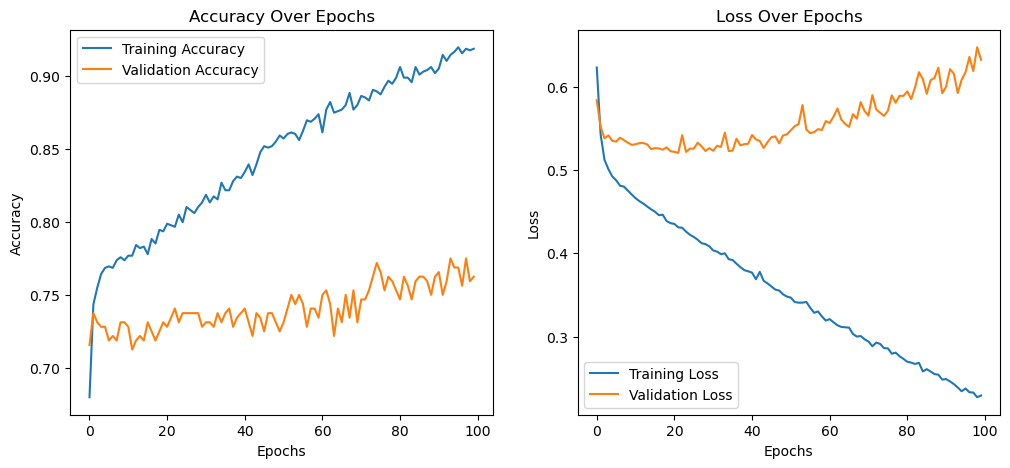

Test Loss: 0.5539, Test Accuracy: 0.7969


In [24]:
# Q2. Load the Wine Quality dataset and explore its dimensions.
import pandas as pd

# Load the dataset from the provided link but link was not working so I downloaded it manually
data = pd.read_csv("./wine.csv")

# Explore dimensions
print("Dataset dimensions:", data.shape)

# Q3. Check for null values and identify categorical variables.
print("Null values in each column before conversion:\n", data.isnull().sum())

# Check the unique values in the 'quality' column before conversion
print("Unique values in 'quality' before conversion:", data['quality'].unique())

# Map 'quality' to binary values
data['quality'] = data['quality'].map({'bad': 0, 'good': 1})

# Check for null values after conversion
print("Null values in each column after conversion:\n", data.isnull().sum())

# Drop rows with NaN values in 'quality' to prevent issues during training
data.dropna(subset=['quality'], inplace=True)

# Check if 'quality' has any valid entries left
if data['quality'].isnull().all():
    raise ValueError("No valid entries in the 'quality' column after conversion.")

# Q4. Separate the features and target variables from the dataset.
X = data.drop('quality', axis=1)
y = data['quality']

# Check the dimensions of the features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
from sklearn.model_selection import train_test_split

# First split for training and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 * 0.8 = 0.2

# Q6. Scale the dataset using an appropriate scaling technique.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
from keras.models import Sequential
from keras.layers import Dense

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Q9. Print the summary of the model architecture.
model.summary()

# Q10. Set the loss function, optimizer, and include the accuracy metric in the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q11. Compile the model with the specified loss function, optimizer, and metrics.
# (This step is already done in Q10)

# Q12. Fit the model to the training data using appropriate batch size and number of epochs.
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), 
                    batch_size=32, epochs=100, verbose=1)

# Q13. Obtain the model's parameters (weights and biases).
weights = model.get_weights()

# Q14. Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)

# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
